(806, 788)


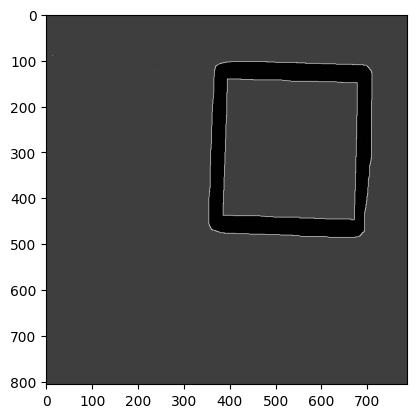

In [129]:
# This is a script that takes in a 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('../maps/e7_floor5_smooth.pgm')
image_array = np.asarray(image)
plt.imshow(image_array, cmap='Greys')
print(image_array.shape)

In [130]:
EDGE = 1
NO_EDGE = 0

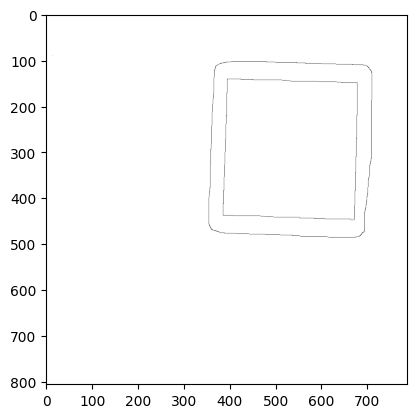

In [131]:
# We are interested in parts of the pixel that are black, represented by 255
image_processed = np.where(image_array > 100, NO_EDGE, EDGE)
plt.imshow(image_processed, cmap='Greys')
plt.show()

## Generating Edges
We expect the map to have exactly two edges, one inside edge and one outside edges.

We start with a particular Y position and move towards the right. As soon as we hit an edge, we know that this is the outer edge. Keep moving inside again and the other one is the inner edge.



In [132]:
MAX_X = image_processed.shape[1]
MAX_Y = image_processed.shape[0]
STARTING_Y = 250

starting_inner_edge_x = None
starting_outer_edge_x = None
for i in range(MAX_X):
	if image_processed[STARTING_Y][i] == EDGE: # The 300 is determined manually right now, it does not work for every map
		if not starting_outer_edge_x:
			starting_outer_edge_x = i
		elif not starting_inner_edge_x:
			starting_inner_edge_x = i
			break

print(starting_inner_edge_x, starting_outer_edge_x)

391 360


In [153]:
image_processed[0][0]

0

In [133]:
starting_inner_edge = (STARTING_Y, starting_inner_edge_x)
starting_outer_edge = (STARTING_Y, starting_outer_edge_x)
def search_edges(starting_point): 
	# Use DFS so adjacent points in the edges array are actually adjacent points
	edges = []
	def dfs(point):
		x, y = point
		edges.append((x, y))
		if image_processed[x+1][y] == EDGE and (x+1, y) not in edges:
			dfs((x+1, y))
		elif image_processed[x-1][y] == EDGE and (x-1, y) not in edges:
			dfs((x-1, y))
		elif image_processed[x][y+1] == EDGE and (x, y+1) not in edges:
			dfs((x, y+1))
		elif image_processed[x][y-1] == EDGE and (x, y-1) not in edges:
			dfs((x, y-1))
		elif image_processed[x+1][y+1] == EDGE and (x+1, y+1) not in edges:
			dfs((x+1, y+1))
		elif image_processed[x+1][y-1] == EDGE and (x+1, y-1) not in edges:
			dfs((x+1, y-1))
		elif image_processed[x-1][y+1] == EDGE and (x-1, y+1) not in edges:
			dfs((x-1, y+1))
		elif image_processed[x-1][y-1] == EDGE and (x-1, y-1) not in edges:
			dfs((x-1, y-1))

	dfs(starting_point)
	return edges
	
	
inner_edges = search_edges(starting_inner_edge)
outer_edges = search_edges(starting_outer_edge)
print(len(inner_edges), len(outer_edges))

1179 1443


In [134]:
print(inner_edges[:5])
print(outer_edges[:5])

[(250, 391), (251, 391), (252, 391), (253, 391), (254, 391)]
[(250, 360), (251, 360), (252, 360), (253, 360), (254, 360)]


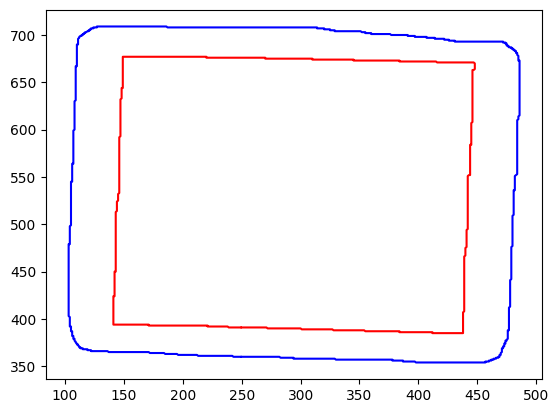

In [135]:
plt.plot([x for x, y in inner_edges], [y for x, y in inner_edges], 'r')
plt.plot([x for x, y in outer_edges], [y for x, y in outer_edges], 'b')

In [143]:
ratio = len(outer_edges) / len(inner_edges)
center_edges = []
for i, outer_edge in enumerate(outer_edges):
	# Choose the associated inner edge
	inner_edge = inner_edges[int(i / ratio)]
	center_edges.append((int((inner_edge[0] + outer_edge[0]) / 2), int((inner_edge[1] + outer_edge[1]) / 2)))

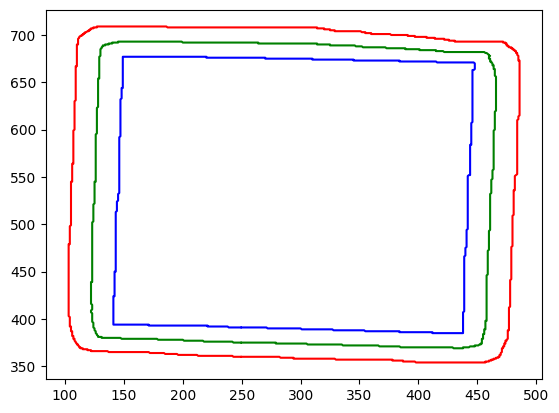

In [144]:
plt.plot([x for x, y in inner_edges], [y for x, y in inner_edges], 'b')
plt.plot([x for x, y in outer_edges], [y for x, y in outer_edges], 'r')
plt.plot([x for x, y in center_edges], [y for x, y in center_edges], 'g')

In [150]:
center_edges[0]

(250, 375)

In [149]:
# resolution = 0.05
# origin: [-18.8, -34.1, 0]
np.array(center_edges[0]) / 20 + np.array([-18.8, -34.1])

array([ -6.3 , -15.35])

In [138]:
data = np.array(center_edges)
cumsum_vec = numpy.cumsum(numpy.insert(data, 0, 0)) 
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

array([[250. , 375.5],
       [250.5, 375.5],
       [251.5, 375.5],
       ...,
       [247. , 375.5],
       [248. , 375.5],
       [249. , 375.5]])

In [7]:
import pandas as pd

reftrack = pd.read_csv('berlin_2018.csv').to_numpy()
reftrack

array([[216.01  ,   5.1944,   5.6174,   4.2348],
       [216.95  ,   6.2147,   5.42  ,   4.3626],
       [217.64  ,   6.9729,   5.4223,   4.3737],
       ...,
       [213.44  ,   2.3746,   5.4189,   4.4127],
       [214.14  ,   3.1428,   5.6184,   4.2683],
       [215.08  ,   4.1702,   5.6181,   4.263 ]])

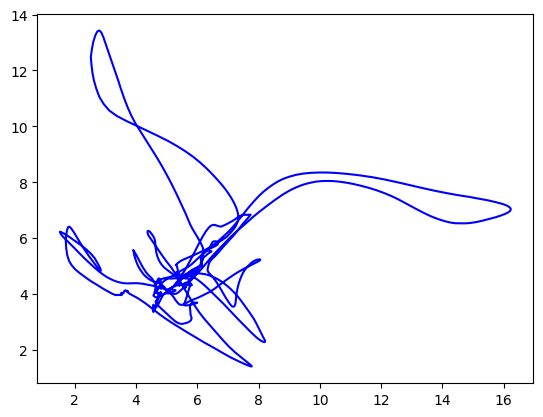

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# plt.figure(3)
# plt.clf()
s = 0.1
# plt.plot(reftrack[:,0], reftrack[:,1], 'r')
plt.plot(reftrack[:,2], reftrack[:,3], 'b')